In [1]:
import json
import pandas as pd
from gensim.corpora import Dictionary
from gensim.utils import simple_preprocess
from gensim.models import ldamodel
from gensim.models import CoherenceModel 
import time
from time import sleep
import googletrans
from googletrans import Translator
from google_trans_new import google_translator  
from random import uniform
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re

In [2]:
with open('image_text.json') as f:
  data_dict = json.load(f)

In [3]:
df = pd.DataFrame.from_dict(data_dict)
df = df.T
df = df.reset_index()

In [27]:
df.head(5)

In [4]:
df.shape

(2415, 2)

In [5]:
clean_df = df

In [6]:
# Defining a function to remove accented characters in the headlines  
def remove_accents(sentence):
    return ", ".join(simple_preprocess(str(sentence), deacc=True, max_len=100))

In [7]:
# Detecting non-English text using regex
def detect_lang(text):
    pat = re.compile("[^\x00-\x7F]") # matches non-English characters
    if pat.search(text):
        return 0
    else:
        return 1

In [8]:
clean_df["is_english"] = df["text"].map(detect_lang)

In [9]:
clean_df.groupby(by='is_english').agg('count')

,index,text
is_english,,
0,1186,1186
1,1229,1229


In [10]:
unique_df = clean_df.drop_duplicates(subset = ["text"])

In [11]:
unique_df.groupby(by='is_english').agg('count')

,index,text
is_english,,
0,1182,1182
1,1114,1114


In [12]:
unique_df.shape

(2296, 3)

In [13]:
english = unique_df[(unique_df['is_english'] ==1)]

In [14]:
english.shape

(1114, 3)

In [23]:
def similar_color_func(word=None, font_size=None,
                       position=None, orientation=None,
                       font_path=None, random_state=None):
    h = 280 # 0 - 360
    s = 17 # 0 - 100
    l = random_state.randint(30, 70) # 0 - 100
    return "hsl({}, {}%, {}%)".format(h, s, l)

In [15]:
comment_words = ''
stop_words = stopwords.words("english")
stop_words.extend(["will","yes"])

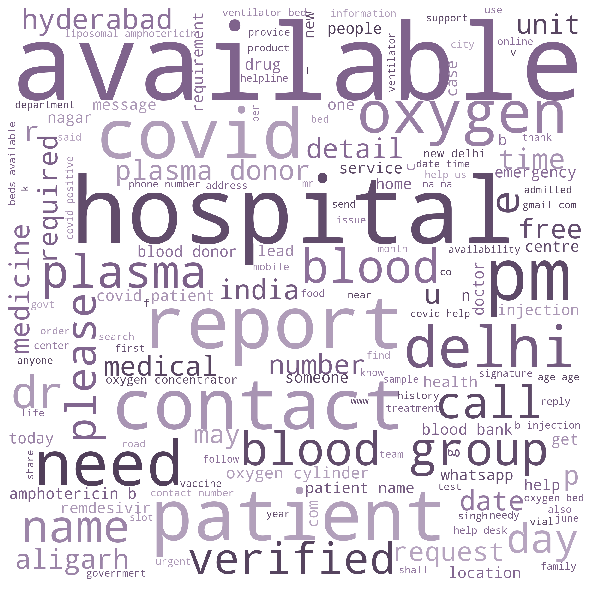

In [18]:
# word cloud for English text
for val in english["text"]:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "


wordcloud = WordCloud(width = 800, height = 800, 
                scale=3,max_words=150,#colormap='RdYlGn',
                background_color ='white', #min_font_size = 10
                color_func=similar_color_func,
                stopwords = stop_words,
                max_font_size=256,
                random_state=42,
                ).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [19]:
with open("comment_words.txt", "w") as text_file:
    text_file.write("%s" % comment_words)


In [20]:
non_english = unique_df[(unique_df['is_english'] ==0)]

In [56]:
%%time
# Translating non-English headlines using googletrans library
translator = google_translator()  
#translator = Translator(service_urls=['translate.googleapis.com'])
non_english["english_text"] = ""
for i, row in non_english.iterrows():
    non_english.at[i, "english_text"] = translator.translate(row["text"],lang_tgt='en')
    time.sleep(uniform(3,5))

<timed exec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


CPU times: user 21.6 s, sys: 1.59 s, total: 23.2 s
Wall time: 1h 28min 34s


In [57]:
non_english.to_csv('non_english_jun2021.csv')

In [16]:
non_english = pd.read_csv('non_english_jun2021.csv')

In [17]:
non_english.shape

(1182, 5)

In [18]:
non_english.head(5)

,Unnamed: 0,index,text,is_english,english_text
0,0,0001d9cb-7e79-41a7-a6c7-29fad655222d.jpg,= लोकमत\nও शहरं\nनाशिक महापालिका कोरोना\nप्रति...,0,= Lokmat\nও cities\nNashik Municipal Corporati...
1,2,005c828e-0c36-48f2-a97b-01dfb253b263.jpg,Natume 10nt\nAmphotericin B\nEmulsion\nस्पाम्प...,0,Natume 10nt\nAmphotericin B\nEmulsion\nस्पाम्प...
2,3,006fa83b-0794-4edf-bf11-1087e4f450be.jpg,Mohd Ahtisham Ahsan\n@MohdAhtishamAh1\nRequire...,0,Mohd Ahtisham Ahsan\n@MohdAhtishamAh1\nRequire...
3,7,00c9eb65-e44c-4316-9dc2-2d6e36a1c62b.jpg,Liposomal Amphotericin B\nInjection\nTM\nAMPHO...,0,Liposomal Amphotericin B\nInjection\nTM\nAMPHO...
4,8,00ce43f5-1a0c-4dbb-a860-e48678d4d654.jpg,शुभ प्रभात\nशुभ मंगलवार\nजय हनुमान ज्ञान गुन स...,0,good morning happy Tuesday Hail lord Hanuman...


In [166]:
# stopword=open("hindi-tokenizer/stopwords.txt","r")
# stop_words=[]
# # pre-process stopword
# for i in stopword:
#     i = re.sub('[\n]', '', i)
#     stop_words.append(i)
#     stopwords = set(stop_words)

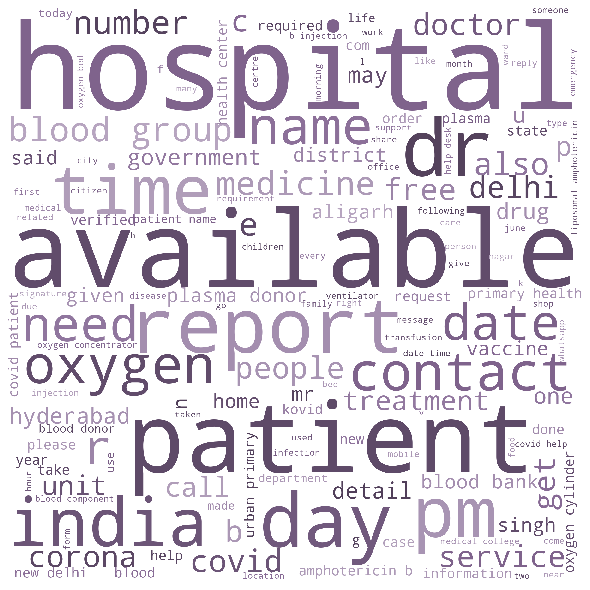

In [196]:
# iterate through the csv file
for val in non_english["english_text"]:    
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                scale=3,max_words=150,#colormap='RdYlGn',
                background_color ='white', #min_font_size = 10
                color_func=similar_color_func,
                stopwords = stop_words,
                max_font_size=256,
                random_state=42,
                ).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [19]:
english["english_text"] =english["text"]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [20]:
all_english = pd.concat([english, non_english])

In [21]:
all_english.shape

(2296, 5)

<Figure size 432x288 with 0 Axes>

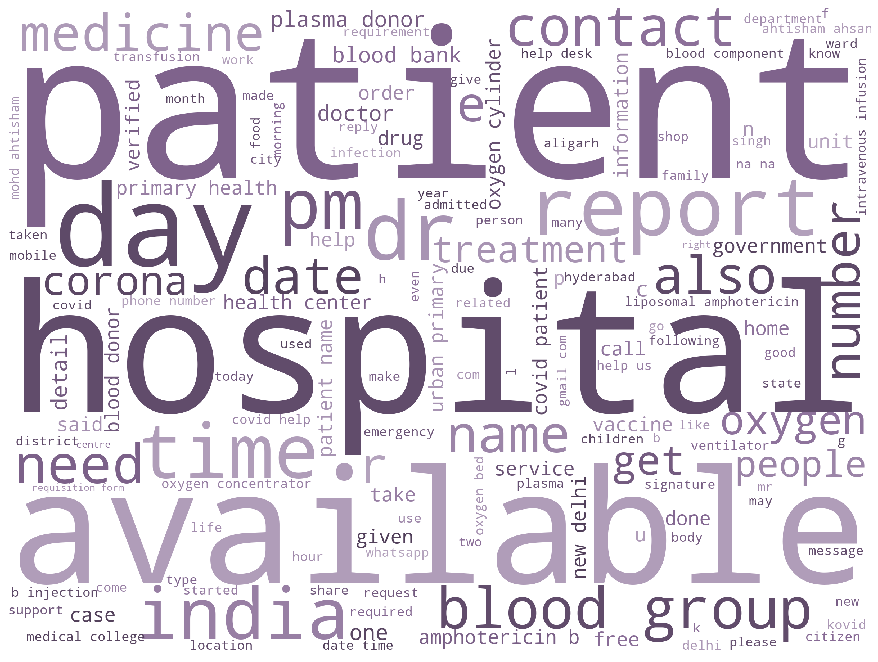

In [24]:
fig = plt.figure()
# iterate through the csv file
for val in all_english["english_text"]:    
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 600, 
                scale=3,
                max_words=150,#colormap='RdYlGn',
                background_color ='white', #min_font_size = 10
                color_func=similar_color_func,
                stopwords = stop_words,
                max_font_size=256,
                random_state=42,
                ).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (12, 9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [26]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(comment_words)
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print(list(word_freq.items())[:10])
print(list(rel_freq.items())[:10])

[('patient', 1332), ('hospital', 1290), ('available', 1270), ('day', 682), ('report', 648), ('dr', 642), ('time', 548), ('india', 546), ('pm', 524), ('blood group', 512)]
[('patient', 1.0), ('hospital', 0.9684684684684685), ('available', 0.9534534534534534), ('day', 0.512012012012012), ('report', 0.4864864864864865), ('dr', 0.481981981981982), ('time', 0.4114114114114114), ('india', 0.4099099099099099), ('pm', 0.3933933933933934), ('blood group', 0.3843843843843844)]


fig.savefig('image_word_cloud_.png')

In [80]:
all_english.to_csv('all_english.csv')